<a href="https://colab.research.google.com/github/Saranyanv/test/blob/master/Reducing%20Commercial%20Aviation%20Fatalities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**REDUCING COMMERCIAL AVIATION FATALITIES**

*https://www.kaggle.com/c/reducing-commercial-aviation-fatalities/data*

In [0]:
import os 
import numpy as np
import zipfile
from tqdm import tqdm
from matplotlib import pyplot as plt
from pandas import DataFrame
import pandas as pd
import seaborn as sns
RANDOM_SEED = 42

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls -l "drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities"

total 439092
-rw------- 1 root root 449629430 Mar 17 03:41 train.csv.zip


In [4]:
!unzip "drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities/train.csv.zip"

Archive:  drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities/train.csv.zip
  inflating: train.csv               


In [5]:
!ls -lrt /content/

total 1205840
---------- 1 root root 1234764001 Dec 14 23:11 train.csv
drwxr-xr-x 1 root root       4096 Apr 26 16:21 sample_data
drwx------ 3 root root       4096 Apr 30 02:54 drive


In [0]:
#train_df = pd.read_csv('train.csv', delim_whitespace=False, names=('id', 'crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event'))
train_df = pd.read_csv('train.csv', header=0, dtype={'crew': np.int32, 'experiment' :str, 'time': np.float64, 'seat': np.int32, 'eeg_fp1': np.float64, 'eeg_f7': np.float64, 'eeg_f8': np.float64, 'eeg_t4': np.float64, 'eeg_t6': np.float64, 'eeg_t5': np.float64, 'eeg_t3': np.float64, 'eeg_fp2': np.float64, 'eeg_o1': np.float64, 'eeg_p3': np.float64, 'eeg_pz': np.float64, 'eeg_f3': np.float64, 'eeg_fz': np.float64, 'eeg_f4': np.float64, 'eeg_c4': np.float64, 'eeg_p4': np.float64, 'eeg_poz': np.float64, 'eeg_c3': np.float64, 'eeg_cz': np.float64, 'eeg_o2': np.float64, 'ecg': np.float64, 'r': np.float64, 'gsr': str, 'event': str})

In [7]:
len(train_df)

4867421

In [8]:
train_df.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,...,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,...,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,...,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


In [0]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [10]:
train_df.crew.value_counts()

6     552958
4     552881
2     552868
5     552815
3     552795
7     552769
13    552724
8     549959
1     447652
Name: crew, dtype: int64

In [0]:
train_df['experiment_DA'] = 0
train_df.loc[train_df['experiment'].isin(['DA']), 'experiment_DA'] = 1

train_df['experiment_CA'] = 0
train_df.loc[train_df['experiment'].isin(['CA']), 'experiment_CA'] = 1

train_df['experiment_SS'] = 0
train_df.loc[train_df['experiment'].isin(['SS']), 'experiment_SS'] = 1

In [0]:
#train_df['crew'] = train_df['crew'].apply({'1': 'crew_1', '2': 'crew_2', '3': 'crew_3', '4': 'crew_4', '5': 'crew_5'
#                                        , '6': 'crew_6', '7': 'crew_7', '8': 'crew_8', '13': 'crew_13'}.get)

In [0]:
class_variance=train_df.groupby('event').agg({'eeg_fp1': np.var, 'eeg_f7': np.var, 'eeg_f8': np.var, 'eeg_t4': np.var, 'eeg_t6': np.var, 'eeg_t5': np.var, 'eeg_t3': np.var
, 'eeg_fp2': np.var, 'eeg_o1': np.var, 'eeg_p3': np.var, 'eeg_pz': np.var, 'eeg_f3': np.var, 'eeg_fz': np.var, 'eeg_f4': np.var
, 'eeg_c4': np.var, 'eeg_p4': np.var, 'eeg_poz': np.var, 'eeg_c3': np.var, 'eeg_cz': np.var, 'eeg_o2': np.var, 'ecg': np.var, 'r': np.var})

In [14]:
class_variance

,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,...,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r
event,,,,,,,,,,,,,,,,,,,,,
A,2558.376805,1659.027471,1745.998022,786.344336,372.836354,427.710878,859.745715,2659.703078,1209.932392,338.024412,...,4753.726891,2296.383872,523.930593,338.407485,449.196670,483.359611,452.667918,818.011390,139176188.177926,6748.073460
B,5324.425947,2716.481836,1102.471025,446.148131,339.792707,258.641433,466.286589,5616.848580,481.718383,232.318824,...,2436.074137,1502.794150,485.897660,280.688936,238.999345,473.871977,369.245890,522.909598,130060628.685917,6204.592809
C,941.973080,477.657898,411.268880,294.099871,252.973207,191.631516,317.920754,993.221244,159.186105,167.151634,...,361.195344,993.030355,241.632850,165.183190,155.534704,223.476354,267.065408,140.930385,160741572.193594,6593.171936
D,1431.137580,659.158884,977.814432,395.949915,252.151568,279.324399,351.768637,1742.181717,269.083880,292.251709,...,709.077280,972.068536,400.496658,288.348257,292.676587,388.780261,505.624664,257.844212,150255397.861736,7227.803104


In [15]:
train_df[300000:450000].groupby('event').agg({'time': np.size})

,time
event,
A,131495.000000
B,7689.000000
C,2004.000000
D,8812.000000


In [0]:
#fig, ax = plt.subplots(figsize=(14, 8))
#sns.countplot(x='event', data=train_df, palette='hls')

In [17]:
train_df.isnull().sum().sum()

0

In [0]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size 
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [0]:
import matplotlib.pyplot as plt
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [0]:
X=train_df[['crew', 'experiment_DA', 'experiment_CA', 'experiment_SS', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r']][300000:450000]
#X=train_df[['crew', 'seat']][1:100000]
y=train_df['event'][300000:450000]

In [0]:
cv = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [0]:
rand_clf1 = GradientBoostingClassifier(n_estimators=50, max_features='auto', random_state=42, learning_rate=0.05)

In [26]:
for train_index, test_index in cv.split(X, y):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, y_train = X.iloc[train_index], y.iloc[train_index]
  X_test, y_test = X.iloc[test_index], y.iloc[test_index]
  rand_clf1.fit(X_train, y_train)
  #scr=rand_clf1.score(X_test, y_test, sample_weight=None)
  acc_scr=accuracy_score(y_test, rand_clf1.predict(X_test), normalize=False)
  print (len(train_index), len(test_index), acc_scr)
  #print (rand_clf.predict(X_test))

120000 30000 29838


In [27]:
print (confusion_matrix(y_test, rand_clf1.predict(X_test), labels=['A','B','C','D']))

[[26292     3     1     3]
 [    0  1538     0     0]
 [    0     0   401     0]
 [  155     0     0  1607]]


In [28]:
print (accuracy_score(y_test, rand_clf1.predict(X_test)))

0.9946


In [29]:
print(rand_clf1.feature_importances_)

[6.94947600e-02 7.16593365e-02 3.57691555e-02 9.83712354e-02
 6.15377069e-01 3.19768161e-03 0.00000000e+00 9.99322482e-05
 0.00000000e+00 4.63619814e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.54071215e-04 2.10998717e-05
 2.16089968e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.20979480e-04 0.00000000e+00 2.39784233e-04 0.00000000e+00
 2.63019091e-06 5.45854319e-04 9.63082719e-02 5.81361934e-03]


In [0]:
feature_names = [x for i,x in enumerate(X_train.columns) if i!=28]

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(14,6))
    n_features = 28
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

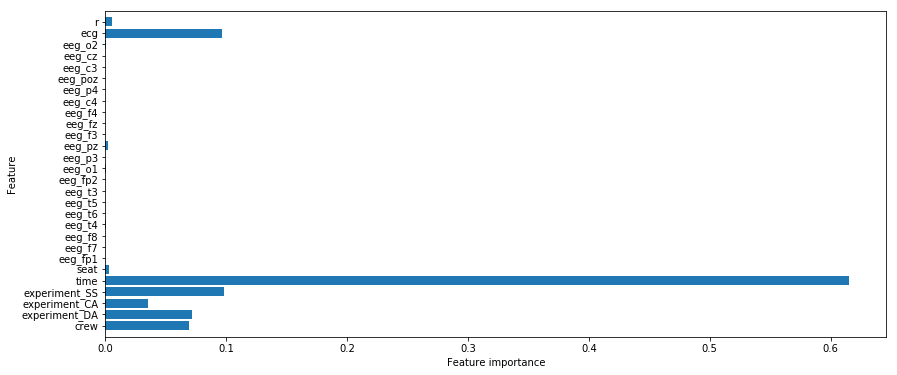

In [31]:
plot_feature_importances_diabetes(rand_clf1)

In [0]:
train_df['event'].value_counts()

A    2848809
C    1652686
D     235329
B     130597
Name: event, dtype: int64

Text(0, 0.5, '')

<Figure size 1440x720 with 0 Axes>

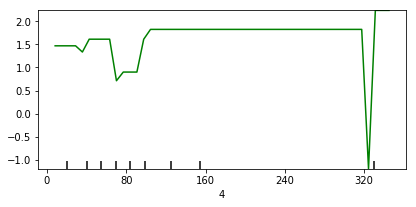

In [76]:
#features = [0,1]

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
#plot = 
#names = X_train.feature_names
plot_partial_dependence(rand_clf1, 
                               #features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27],
                               features=[4],
                               X=X_train,
                               #feature_names=['crew', 'experiment_DA', 'experiment_CA', 'experiment_SS', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r'],
                               #feature_names=['time'],
                               n_jobs=3, 
                               grid_resolution=50,
                               label='A'
                              )
plt.ylabel('')
#https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

Text(0, 0.5, '')

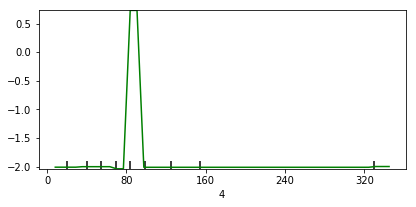

In [77]:
plot_partial_dependence(rand_clf1, 
                               #features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27],
                               features=[4],
                               X=X_train,
                               #feature_names=['crew', 'experiment_DA', 'experiment_CA', 'experiment_SS', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r'],
                               #feature_names=['time'],
                               n_jobs=3, 
                               grid_resolution=50,
                               label='B'
                              )
plt.ylabel('')

Text(0, 0.5, '')

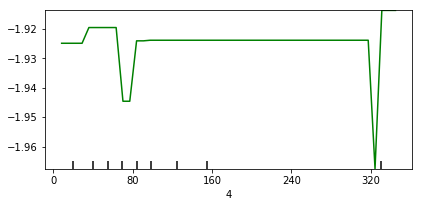

In [78]:
plot_partial_dependence(rand_clf1, 
                               #features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27],
                               features=[4],
                               X=X_train,
                               #feature_names=['crew', 'experiment_DA', 'experiment_CA', 'experiment_SS', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r'],
                               #feature_names=['time'],
                               n_jobs=3, 
                               grid_resolution=50,
                               label='C'
                              )
plt.ylabel('')

Text(0, 0.5, '')

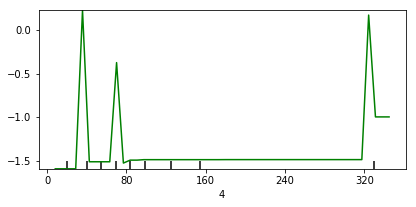

In [79]:
plot_partial_dependence(rand_clf1, 
                               #features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27],
                               features=[4],
                               X=X_train,
                               #feature_names=['crew', 'experiment_DA', 'experiment_CA', 'experiment_SS', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r'],
                               #feature_names=['time'],
                               n_jobs=3, 
                               grid_resolution=50,
                               label='D'
                              )
plt.ylabel('')

In [0]:
from sklearn.naive_bayes import GaussianNB 

In [0]:
gnb_clf1 = GaussianNB(priors=None, var_smoothing=1e-09)

In [87]:
for train_index, test_index in cv.split(X, y):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, y_train = X.iloc[train_index], y.iloc[train_index]
  X_test, y_test = X.iloc[test_index], y.iloc[test_index]
  gnb_clf1.fit(X_train, y_train)
  #scr=rand_clf1.score(X_test, y_test, sample_weight=None)
  acc_scr=accuracy_score(y_test, gnb_clf1.predict(X_test), normalize=False)
  print (len(train_index), len(test_index), acc_scr)
  #print (rand_clf.predict(X_test))

120000 30000 15140


In [88]:
print (confusion_matrix(y_test, gnb_clf1.predict(X_test), labels=['A','B','C','D']))

[[11715  3057    68 11459]
 [  186  1352     0     0]
 [   14     0   387     0]
 [   76     0     0  1686]]
